In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import scipy
import scipy.signal

In [4]:
fs = 44100

In [7]:
t = np.arange(int(fs*2e-3))/fs

In [9]:
chirp = scipy.signal.chirp(t, 10e3, 2e-3, 20e3)

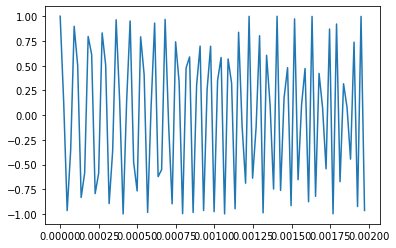

In [10]:
plt.plot(t, chirp)

In [11]:
import sonar


In [13]:
a = np.arange(10).astype(np.float32)

b'\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00@@\x00\x00\x80@\x00\x00\xa0@\x00\x00\xc0@\x00\x00\xe0@\x00\x00\x00A\x00\x00\x10A'